In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question** Importer le fichier `heart_Disease.csv` dans un `dataframe`. Regarder les premières lignes, regardez les statistiques descriptives.

In [2]:
df = pd.read_csv("./heart_Disease.csv")

# Observation

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Question** Regardez l'aide sur `nunique` de pandas et afficher des informations complémentaires sur ce dataset. Les valeurs numériques sont elles toutes des valeurs continues ou des valeurs discrètes ? 

In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Les attributs ici qui ont un nombre de valeurs supérieur à 5 sont plutôt à interpréter comme des attributs à valeurs continues et les autres des attributs catégoriels à valeurs discrètes. 

In [6]:
attrs_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
attrs_cat = list(set(df.columns).difference(set(attrs_cont)))
attrs_cat.remove('target')
attrs_cat

['fbs', 'sex', 'thal', 'ca', 'restecg', 'slope', 'exang', 'cp']

**Question** Une `DataFrame` est une collection de `Series` qui sont les colonnes. On peut aussi regarder les différentes valeurs que peuvent prendre les colonnes avec `value_counts`. Regardez les différentes valeurs de chaque colonne et en particulier de la `target`.

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Question** Tracer des histogrammes représentant ces comptages. Vous pouvez directement utiliser la méthode `hist`des `DataFrames` ou des `Series`.

<AxesSubplot:>

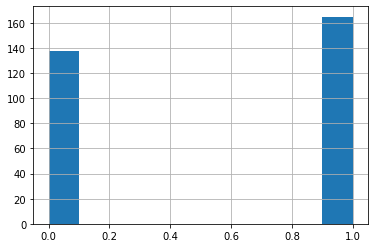

In [8]:
df['target'].hist()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

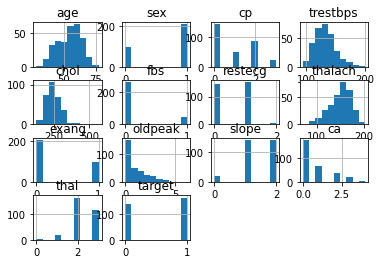

In [9]:
df.hist()

# Petit rappel de Pandas

In [10]:
df['age'].head()  # sélection d'une colonne

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [11]:
df[['age', 'sex']].head() # sélection de colonnes

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [12]:
df.iloc[:,0:2].head() # sélection lignes et de colonnes par les indices

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [13]:
df['sex']==0  # filtre, série de booléens

0      False
1      False
2       True
3      False
4       True
       ...  
298     True
299    False
300    False
301    False
302     True
Name: sex, Length: 303, dtype: bool

In [14]:
df[df['sex']==0] # application d'un filtre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [15]:
df[df['sex']==0][['age','slope']]  # cumuler un filtre et une sélection

,age,slope
2,41,2
4,57,2
6,56,1
11,48,2
14,58,2
...,...,...
289,55,1
292,58,1
296,63,1
298,57,1


# Préparation

**Question** Préparer l'échantillon pour permettre une évaluation de l'erreur.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.iloc[:,:-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Classe majoritaire

**Question** Dans un problème de classification, il faut toujours évaluer les performances d'un classifieur par rapport à quelque chose de très bête qui est la fonction constante qui prédit la classe la plus fréquente. D'après les statistiques quel serait la performance d'une telle règle sur l'échantillon complet?

*Réponse* : 54%

**Question** On peut trouver d'autres classeurs très bêtes comme celui-ci dans le package `dummy` de sklearn. Faites un tel classifieur qui prédit la classe majoritaire avec une des instances d'un des modules de ce package.

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
d = DummyClassifier(strategy="most_frequent")
d.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [20]:
d.score(X_test, y_test)

0.5657894736842105

# Naive Bayes

**Question** Lire l'explication introductive de Naive Bayes dans la [documentation de sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). On refait quelques calculs presque à la main, de façon pas très maligne, juste pour décomposer et comprendre...

**Question** Prenons les attributs `sex` et `fbs`. Calculons le nombre de fois où `sex` vaut 1 et 0 quand la cible `target` vaut 1.

In [21]:
X_train[y_train==1]['sex'].value_counts()

1    71
0    51
Name: sex, dtype: int64

**Question** Calculer les probabilités  P(sex=1|target=1), P(sex=0|target=1) nommés p1s1 et p1s0

In [22]:
p1s1 = 69/(69+49)
p1s0 = 49/(69+49)  # ou 1-p1s1

**Question** Prenons les attributs `sex` et `fbs`. Calculons les probabilités suivantes sur l'échantillon de train.
- P(sex|target), c'est-à-dire les 4 valeurs P(sex=1|target=1), P(sex=0|target=1), P(sex=1|target=0), P(sex=0|target=0). Nommés p1s1, p1s0, p0s1, p0s0 
- P(fbs|target) (4 valeurs). Nommés p1f1, p1f0, p0f1, p0f0 

In [23]:
X_train[y_train==0]['sex'].value_counts()

1    86
0    19
Name: sex, dtype: int64

In [24]:
p0s1, p0s0 = 90/109, 19/109

In [25]:
X_train[y_train==1]['fbs'].value_counts()

0    107
1     15
Name: fbs, dtype: int64

In [26]:
p1f0, p1f1 = 101/118, 17/118

In [27]:
X_train[y_train==0]['fbs'].value_counts()

0    87
1    18
Name: fbs, dtype: int64

In [28]:
p0f0, p0f1 = 91/109, 18/109

**Question** Toujours sur le train, quelles sont les probabilités d'avoir la cible à 1 ou à 0 ? p1, p0

In [29]:
p1 = np.sum(y_train==1)/len(y_train)
p0 = 1- p1
p0, p1

(0.4625550660792952, 0.5374449339207048)

**Question** Maintenant prenons le premier exemple du test et regardons les attributs `sex` et `fbs`. Avec le modèle de Naive Bayes, quelle serait la valeur de la cible qui serait prédite et pourquoi ? 

In [30]:
X_test[['sex','fbs']].head()

,sex,fbs
64,1,1
75,0,0
230,1,0
185,1,0
128,0,0


In [31]:
p0_estime =  p0 * p0s1 * p0f0
p1_estime =  p1 * p1s1 * p1f0
total = p0_estime + p1_estime
p0_estime/total, p1_estime/total

(0.5424115783001756, 0.4575884216998243)

*Réponse* : C'est donc 0 la valeur prédite.

**Question** Importez `CategoricalNB` et appliquez le classifeur en ne prenant en compte que les attributs `sex` et `fbs` pour retrouver ces résultats.

In [32]:
from sklearn import naive_bayes
nb = naive_bayes.CategoricalNB()
attrs = ['sex', 'fbs']

In [33]:
nb.fit(X_train[attrs], y_train)
nb.score(X_test[attrs], y_test)

0.6447368421052632

In [34]:
nb.predict_proba(X_test[attrs])[0], nb.predict(X_test[attrs])[0]

(array([0.62385354, 0.37614646]), 0)

**Question** Appliquez le classifeur surles attributs catégoriels et estimer le score.

In [35]:
nb.fit(X_train[attrs_cat], y_train)
nb.score(X_test[attrs_cat], y_test)

0.8421052631578947

# Arbres de décision

**Question** Utilisez la classe `DecisionTreeClassifier` du package `tree` pour créer un arbre de décision. Quel est le score obtenu ?

In [36]:
from sklearn import tree

In [37]:
dtree = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [38]:
dtree.score(X_test, y_test)

0.8552631578947368

**Question** Afficher cet arbre, sous forme de texte et sous forme de dessin.

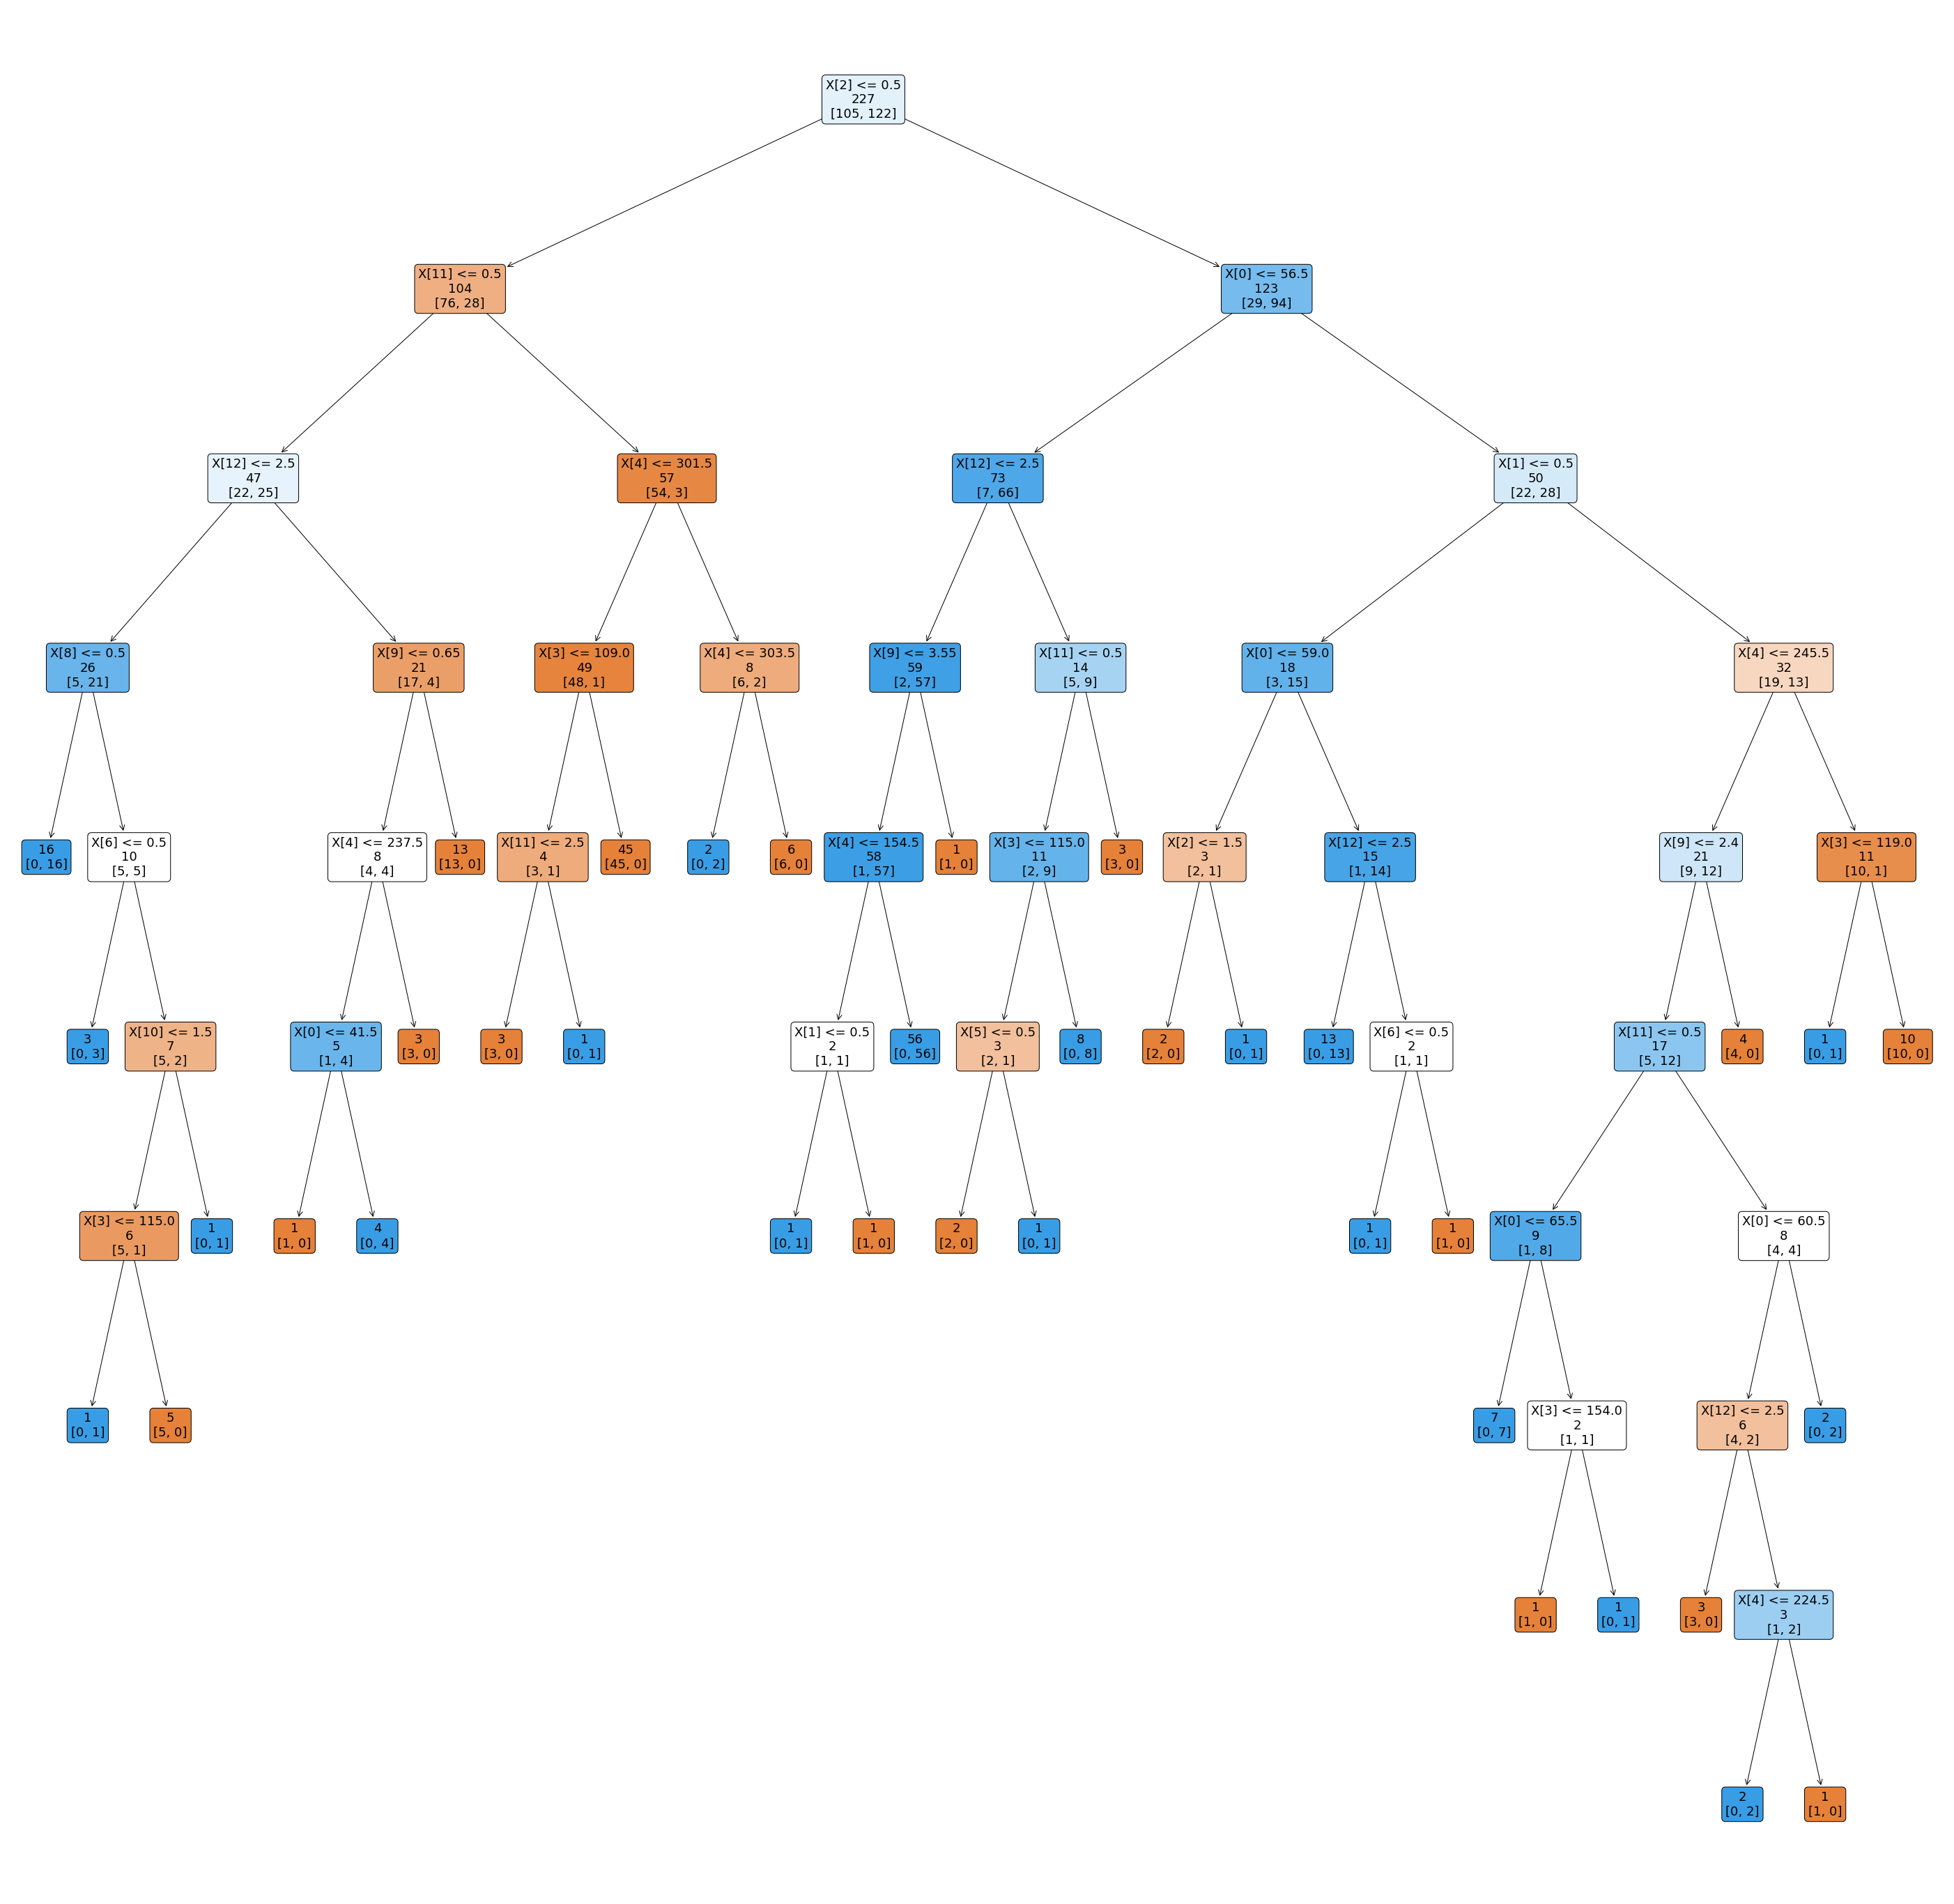

In [87]:
fig, ax = plt.subplots(figsize=(50,50))

tree.plot_tree(dtree, filled=True, label=None, impurity=False, rounded=True, fontsize=18, ax=ax)
plt.show()
None

In [40]:
print(tree.export_text(dtree, feature_names=list(X.columns)))

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- exang >  0.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |--- trestbps <= 115.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- trestbps >  115.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- thal >  2.50
|   |   |   |--- oldpeak <= 0.65
|   |   |   |   |--- chol <= 237.50
|   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  237.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- oldpeak >  0.65
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- chol <= 301.50
|   |   |   |-

**Question** Faites une recherche du meilleur arbre de décision en jouant sur les hyperparamètres `max_depth` entre 2 et 10 et `criterion` qui peut être `"gini"` ou  `"entropy"`

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = {'max_depth': range(2,10), 'criterion': ["gini", "entropy"], 'max_features': range(1,13)}
clf = GridSearchCV(dtree, params)

In [43]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': range(1, 13)})

In [44]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 9}

In [45]:
clf.best_score_

0.8103381642512076

**Question** Afficher l'arbre correspondant au meilleur estimateur.

In [46]:
print(tree.export_text(clf.best_estimator_, feature_names=list(X.columns)))

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- exang >  0.50
|   |   |   |   |--- age <= 51.50
|   |   |   |   |   |--- age <= 44.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  44.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  51.50
|   |   |   |   |   |--- trestbps <= 119.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  119.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- thal >  2.50
|   |   |   |--- chol <= 237.50
|   |   |   |   |--- oldpeak <= 0.70
|   |   |   |   |   |--- trestbps <= 147.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  147.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldpeak >  0.70
|   |   |   |   |   |--- class: 0
|   |   |   |--- chol >  237.50
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- exang <= 0.50
|   |   |   |--- oldpea

# Régression logistique 

## Observation

In [47]:
from ipywidgets import interact

def logistic_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(a, x) + b))) 

def loss_logistic(x ,a, b):
    return np.log(np.exp(-(np.dot(a, x) + b))+1)

funcs = {"loss":loss_logistic, "sigmoïde": logistic_sigmoid}
grid_size = 0.1
x_grid = np.arange(-5, 5, grid_size)

plt.clf()

def plot_logistic_sigmoid(f, a, b):
    plt.plot(x_grid, funcs[f](x_grid, a, b), '-b')
    plt.axis([-5, 5, 0, 1])
    plt.show()


interact(
    plot_logistic_sigmoid,
    a=(-10, 10, .25),
    b=(-10, 10),
    f=['sigmoïde', 'loss']
)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='f', options=('sigmoïde', 'loss'), value='sigmoïde'), FloatSlider(v…

<function __main__.plot_logistic_sigmoid(f, a, b)>

## Application

**Question** Importer `LogisticRegression` et entraîner un classifieur. Afficher le score. Adaptez le nombre d'itérations...

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/tommasi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8289473684210527

In [49]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8722466960352423

In [50]:
lr.score(X_test, y_test)

0.8289473684210527

**Question** Avec `LogisticRegressionCV` réglez les hyperparamètres. Quelle valeur de $C$ a été trouvée ? 

In [51]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(max_iter=1000)
lrcv.fit(X_train, y_train)
lrcv.score(X_train, y_train)

0.8810572687224669

In [52]:
lrcv.C_, lr.C

(array([0.35938137]), 1.0)

In [53]:
lrcv.score(X_test, y_test)

0.8289473684210527

In [54]:
best_C = lrcv.C_[0]
best_C

0.3593813663804626

## Scaling

Alors que ce n'est pas nécessaire pour les arbres de décision ou NaiveBayes, il pourrait être opportun de normaliser les attributs continus avec d'autres classifieurs...

**Question** Utiliser `StandardScaler` pour normaliser les attributs continus sur le train. Composer alors un nouveau jeu de données `X_train_scaled` avec les attributs continus normalisés et les attributs catégoriels inchangés. On utilisera `fit` pour entrainer la transformation puis `transform` pour l'appliquer au test ensuite... donnant `X_test_scaled`. 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scale = StandardScaler()
scale.fit(X_train[attrs_cont])

StandardScaler()

In [57]:
X_train_scaled = np.hstack([X_train[attrs_cat], scale.transform(X_train[attrs_cont])])
X_test_scaled = np.hstack([X_test[attrs_cat], scale.transform(X_test[attrs_cont])])

**Question** Réentraîner le classifieur par régression logistique avec ce nouveau jeu de données et estimer les scores.

In [58]:
lrcv.fit(X_train_scaled, y_train)
lrcv.score(X_train_scaled, y_train)

0.8810572687224669

In [59]:
lrcv.score(X_test_scaled, y_test)

0.8289473684210527

# SVC...

**Question** Même si cela n'a pas été étudié en cours... on peut aussi utiliser le classifieur `SVC` (voir [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)) 

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)

(0.8898678414096917, 0.8289473684210527)

In [62]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.6563876651982379, 0.7105263157894737)

# Vote de classifieurs

In [63]:
from sklearn.ensemble import VotingClassifier

In [64]:
lr.set_params(C=best_C)

LogisticRegression(C=0.3593813663804626, max_iter=1000)

In [65]:
estimators = [
    ('svc', svc),
    ('lr', lr),
    ('dt', dtree)
    ]

In [66]:
vote = VotingClassifier(estimators=estimators, voting='hard')

In [67]:
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC()),
                             ('lr',
                              LogisticRegression(C=0.3593813663804626,
                                                 max_iter=1000)),
                             ('dt', DecisionTreeClassifier())])

In [68]:
vote.score(X_test, y_test)

0.8421052631578947

In [69]:
for name,clf in estimators:
    print("Classifieur {} ({}), score: {}".format(name, clf.__class__.__name__, clf.score(X_test, y_test)))

Classifieur svc (SVC), score: 0.7105263157894737
Classifieur lr (LogisticRegression), score: 0.8289473684210527
Classifieur dt (DecisionTreeClassifier), score: 0.8552631578947368
